In [38]:
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import json
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from patsy import dmatrices

In [39]:
tract_pop_income = pd.read_csv("../geospatial_api-silver-sharks/data/tract_pop_income.csv")

In [40]:
burg_base_pois =  (sm.GLM(endog = tract_pop_income['burglary_count'],
                              exog = sm.add_constant(tract_pop_income[[]]),
                              family = sm.families.Poisson(),
                              offset = tract_pop_income['log_population'])
                       .fit()
 )
burg_base_pois.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         burglary_count   No. Observations:                  144
Model:                            GLM   Df Residuals:                      143
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -542.47
Date:                Mon, 11 Oct 2021   Deviance:                       616.21
Time:                        08:14:39   Pearson chi2:                 1.32e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7279      0.036   -186.571      0.000      -6.799      -6.657
==============================================================================
"""

In [41]:
burg_income_pois =  (sm.GLM(endog = tract_pop_income['burglary_count'],
                              exog = sm.add_constant(tract_pop_income['median_income']),
                              family = sm.families.Poisson(),
                              offset = tract_pop_income['log_population'])
                       .fit()
 )
burg_income_pois.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         burglary_count   No. Observations:                  144
Model:                            GLM   Df Residuals:                      142
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -483.16
Date:                Mon, 11 Oct 2021   Deviance:                       497.59
Time:                        08:14:41   Pearson chi2:                 1.02e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5612
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.6562      0.105    -53.986      0.000      -5.862      -5.451
median_income -1.821e-05    1.8e-06    -10.111      0.000   -2.17e-05   -1.47e-05
=================================================================================
"""

C:\Users\Conrad\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


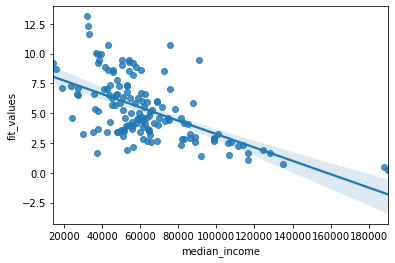

In [42]:
tract_pop_income['fit_values'] = burg_income_pois.fittedvalues

sns.regplot('median_income', 'fit_values',
                data = tract_pop_income);

In [43]:
#fill
np.exp(burg_base_pois.params['const'])
#full_like


0.0011970175738991013

In [44]:
line = np.linspace(0, 3, num=200)

C:\Users\Conrad\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

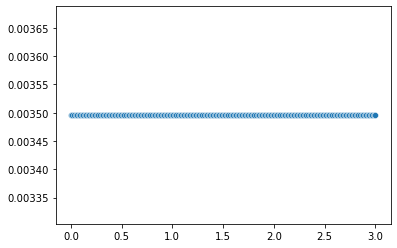

In [45]:
y = np.full_like(line, np.exp(burg_income_pois.params['const']))

sns.scatterplot(line, y)

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
numpy.full_like(a, fill_value, dtype=None, order='K', subok=True, shape=None)
np.exp(poisreg_burglaries.params['const'])

https://seaborn.pydata.org/generated/seaborn.regplot.html


In [56]:
mask = np.random.rand(len(tract_pop_income)) < 0.8

tract_pop_income_train = tract_pop_income[mask]
tract_pop_income_test = tract_pop_income[~mask]
print('Training data set length='+str(len(tract_pop_income_train)))
print('Testing data set length='+str(len(tract_pop_income_test)))


Training data set length=116
Testing data set length=28


In [86]:
expr = """burglary_count ~ median_income"""

y_train, X_train = dmatrices(expr, tract_pop_income, return_type='dataframe')
y_test, X_test = dmatrices(expr, tract_pop_income, return_type='dataframe')

poisson_training_results = (sm.GLM(y_train, X_train, 
                                   family=sm.families.Poisson(),
                                   offset = tract_pop_income['log_population'])
                            .fit())                                    
display(poisson_training_results.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         burglary_count   No. Observations:                  144
Model:                            GLM   Df Residuals:                      142
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -483.16
Date:                Mon, 11 Oct 2021   Deviance:                       497.59
Time:                        13:00:44   Pearson chi2:                 1.02e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5612
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.6562      0.105    -53.986      0.000      -5.862      -5.451
median_income -1.821e-05    1.8e-06    -10.111      0.000   -2.17e-05   -1.47e-05
=================================================================================
"""

In [88]:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[ 3.1720864   4.77435528  3.71220993  4.62915138  4.611488    6.78125736
  7.2451568  13.12238387  6.03385324  6.67599032  5.90288272  5.88282629
  6.50789541  6.62729272  7.27692063  5.68632414  3.82211117  9.98921635
  7.32014725 10.75775385  3.59587081  2.94935343  4.18439839  8.59258243
  6.3936838   4.06577756  5.2526603   5.95454123  4.25553764  3.48379454
  1.052449    1.38385551  3.05868872 11.60782951  3.68619592 10.08775252
  7.03494002  2.69151897  3.94487414  3.59166351  3.97750004  3.28569721
  7.10572268 12.29336811  3.69496406  3.2949844   4.58739282  3.41837837
  3.39704649  8.68940282  4.42930972  2.63461974  6.04657182  5.5596233
  4.63167134  5.50482802  4.01716849  5.69700404  5.08417532  8.57701318
  9.18775053  9.24920429  5.03619769  8.46971565  2.81062941  8.51458726
  4.61033126  9.4714325   2.99715707  8.62182276  6.29036451  6.65107523
  9.43496709  3.43525999  5.2600879   9.30365624  5.85350866 10.74988841
  2.15120747  9.98768825  5.14566104  6.29880307  7.

In [89]:
tract_pop_income['burglary_lambda'] = poisson_training_results.mu

tract_pop_income['AUX_OLS_DEP'] = (tract_pop_income.apply(
    lambda x: ((x['burglary_count'] - x['burglary_lambda'])**2 - x['burglary_lambda']) / 
              x['burglary_lambda'], 
               axis=1))

ols_expr = """AUX_OLS_DEP ~ burglary_lambda -1"""

aux_olsr_results = smf.ols(ols_expr, tract_pop_income).fit()

print(aux_olsr_results.params)

burglary_lambda    0.681586
dtype: float64


In [90]:
aux_olsr_results.tvalues

burglary_lambda    0.847271
dtype: float64

In [92]:
nb2_training_results = (sm.GLM(y_train, X_train,
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0]),
                              offset = tract_pop_income['log_population'])
                        .fit())
nb2_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         burglary_count   No. Observations:                  144
Model:                            GLM   Df Residuals:                      142
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -387.92
Date:                Mon, 11 Oct 2021   Deviance:                       100.58
Time:                        13:01:25   Pearson chi2:                     248.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1615
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.7588      0.211    -27.284      0.000      -6.172      -5.345
median_income -1.476e-05   3.26e-06     -4.525      0.000   -2.12e-05   -8.37e-06
=================================================================================
"""

In [93]:
nb2_training_results = (sm.GLM(y_train,
                              X_train, 
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit())
display(nb2_training_results.summary()
    )

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         burglary_count   No. Observations:                  144
Model:                            GLM   Df Residuals:                      142
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -379.55
Date:                Mon, 11 Oct 2021   Deviance:                       83.840
Time:                        13:01:36   Pearson chi2:                     144.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1021
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3452      0.203     11.545      0.000       1.947       2.743
median_income -1.149e-05    3.1e-06     -3.703      0.000   -1.76e-05   -5.41e-06
=================================================================================
"""

In [95]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

predictions_summary_frame = nb2_predictions.summary_frame()
display(predictions_summary_frame)

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,4.953697,0.393935,4.238761,5.789219
1,4.962585,0.394233,4.247053,5.798668
2,5.009796,0.396040,4.290718,5.849383
3,5.069732,0.398891,4.345220,5.915048
4,5.746914,0.474844,4.887686,6.757188
...,...,...,...,...
139,5.557351,0.445703,4.748987,6.503315
140,8.856788,1.445096,6.432682,12.194400
141,4.100891,0.416885,3.360063,5.005057
142,4.385527,0.399867,3.667840,5.243645


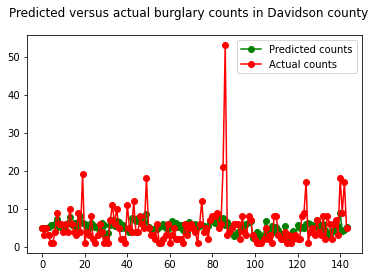

In [97]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['burglary_count']
fig = plt.figure()
fig.suptitle('Predicted versus actual burglary counts in Davidson county')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted,actual])
plt.show()

C:\Users\Conrad\AppData\Local\Temp/ipykernel_8488/2104492844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tract_pop_income_train['fit_values'] = nb2_training_results.fittedvalues
C:\Users\Conrad\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


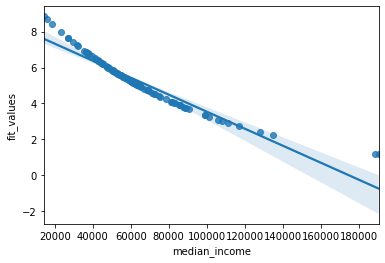

In [98]:
tract_pop_income_train['fit_values'] = nb2_training_results.fittedvalues

sns.regplot('median_income', 'fit_values',
                data = tract_pop_income_train);